In [1]:
import pandas as pd
import re
from tqdm.notebook import tqdm
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime as dt
from datetime import timedelta as td
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
jobs = pd.read_csv("../data/jobs_data.csv", parse_dates=['BEGIN', 'END'])

In [4]:
jobs = jobs.drop(columns='Unnamed: 0')
jobs.head()

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,REQMEMTOT,REQMEMPERCORE,ROLL1DAY,ROLL1HOUR,ROLL7DAY,ROLL7DAYAVG,ROLL30DAY,ROLL30DAYAVG
0,24460577,COMPLETED,2020-10-01 00:05:55,2020-10-01 00:10:15,4096,868.77M,0 days 12:00:00,0 days 00:04:20,1,1,production,0:0,4096,4096.0,1.0,1.0,1.0,0.142857,1.0,0.033333
1,24460647,COMPLETED,2020-10-01 00:10:38,2020-10-01 00:12:58,2000,0.09M,2 days 00:00:00,0 days 00:02:20,1,1,sam,0:0,2000,2000.0,2.0,2.0,2.0,0.285714,2.0,0.066667
2,24460639,COMPLETED,2020-10-01 00:11:22,2020-10-01 00:13:31,1024,221.10M,0 days 00:30:00,0 days 00:02:09,1,1,production,0:0,1024,1024.0,3.0,3.0,3.0,0.428571,3.0,0.100000
3,24460668,COMPLETED,2020-10-01 00:15:16,2020-10-01 00:17:23,2000,0.09M,2 days 00:00:00,0 days 00:02:07,1,1,sam,0:0,2000,2000.0,4.0,4.0,4.0,0.571429,4.0,0.133333
4,24460671,FAILED,2020-10-01 00:17:08,2020-10-01 00:17:53,1024,636.96M,0 days 00:30:00,0 days 00:00:45,1,1,production,0:9,1024,1024.0,5.0,5.0,5.0,0.714286,5.0,0.166667


In [5]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7395234 entries, 0 to 7395233
Data columns (total 20 columns):
 #   Column         Dtype         
---  ------         -----         
 0   JOBID          object        
 1   STATE          object        
 2   BEGIN          datetime64[ns]
 3   END            datetime64[ns]
 4   REQMEM         int64         
 5   USEDMEM        object        
 6   REQTIME        object        
 7   USEDTIME       object        
 8   NODES          int64         
 9   CPUS           int64         
 10  PARTITION      object        
 11  EXITCODE       object        
 12  REQMEMTOT      int64         
 13  REQMEMPERCORE  float64       
 14  ROLL1DAY       float64       
 15  ROLL1HOUR      float64       
 16  ROLL7DAY       float64       
 17  ROLL7DAYAVG    float64       
 18  ROLL30DAY      float64       
 19  ROLL30DAYAVG   float64       
dtypes: datetime64[ns](2), float64(7), int64(4), object(7)
memory usage: 1.1+ GB


In [6]:
display(jobs.head())
jobs = jobs.sort_values('END')
jobs.head()

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,REQMEMTOT,REQMEMPERCORE,ROLL1DAY,ROLL1HOUR,ROLL7DAY,ROLL7DAYAVG,ROLL30DAY,ROLL30DAYAVG
0,24460577,COMPLETED,2020-10-01 00:05:55,2020-10-01 00:10:15,4096,868.77M,0 days 12:00:00,0 days 00:04:20,1,1,production,0:0,4096,4096.0,1.0,1.0,1.0,0.142857,1.0,0.033333
1,24460647,COMPLETED,2020-10-01 00:10:38,2020-10-01 00:12:58,2000,0.09M,2 days 00:00:00,0 days 00:02:20,1,1,sam,0:0,2000,2000.0,2.0,2.0,2.0,0.285714,2.0,0.066667
2,24460639,COMPLETED,2020-10-01 00:11:22,2020-10-01 00:13:31,1024,221.10M,0 days 00:30:00,0 days 00:02:09,1,1,production,0:0,1024,1024.0,3.0,3.0,3.0,0.428571,3.0,0.100000
3,24460668,COMPLETED,2020-10-01 00:15:16,2020-10-01 00:17:23,2000,0.09M,2 days 00:00:00,0 days 00:02:07,1,1,sam,0:0,2000,2000.0,4.0,4.0,4.0,0.571429,4.0,0.133333
4,24460671,FAILED,2020-10-01 00:17:08,2020-10-01 00:17:53,1024,636.96M,0 days 00:30:00,0 days 00:00:45,1,1,production,0:9,1024,1024.0,5.0,5.0,5.0,0.714286,5.0,0.166667


,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,REQMEMTOT,REQMEMPERCORE,ROLL1DAY,ROLL1HOUR,ROLL7DAY,ROLL7DAYAVG,ROLL30DAY,ROLL30DAYAVG
0,24460577,COMPLETED,2020-10-01 00:05:55,2020-10-01 00:10:15,4096,868.77M,0 days 12:00:00,0 days 00:04:20,1,1,production,0:0,4096,4096.0,1.0,1.0,1.0,0.142857,1.0,0.033333
1,24460647,COMPLETED,2020-10-01 00:10:38,2020-10-01 00:12:58,2000,0.09M,2 days 00:00:00,0 days 00:02:20,1,1,sam,0:0,2000,2000.0,2.0,2.0,2.0,0.285714,2.0,0.066667
2,24460639,COMPLETED,2020-10-01 00:11:22,2020-10-01 00:13:31,1024,221.10M,0 days 00:30:00,0 days 00:02:09,1,1,production,0:0,1024,1024.0,3.0,3.0,3.0,0.428571,3.0,0.100000
3,24460668,COMPLETED,2020-10-01 00:15:16,2020-10-01 00:17:23,2000,0.09M,2 days 00:00:00,0 days 00:02:07,1,1,sam,0:0,2000,2000.0,4.0,4.0,4.0,0.571429,4.0,0.133333
4,24460671,FAILED,2020-10-01 00:17:08,2020-10-01 00:17:53,1024,636.96M,0 days 00:30:00,0 days 00:00:45,1,1,production,0:9,1024,1024.0,5.0,5.0,5.0,0.714286,5.0,0.166667


In [7]:
success = jobs[(jobs['EXITCODE'] == '0:0') & (jobs['STATE'] == 'COMPLETED')]

In [8]:
cancelled = jobs[jobs['STATE'].str.contains("CANCELLED")]
cancelled.head()

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,REQMEMTOT,REQMEMPERCORE,ROLL1DAY,ROLL1HOUR,ROLL7DAY,ROLL7DAYAVG,ROLL30DAY,ROLL30DAYAVG
160,24460893,CANCELLED by 9203,2020-10-01 00:25:28,2020-10-01 00:43:25,5000,6.23M,2 days 00:00:00,0 days 00:17:57,1,1,production,127:0,5000,5000.00,161.0,161.0,161.0,23.000000,161.0,5.366667
161,24460997,CANCELLED by 9203,2020-10-01 00:31:00,2020-10-01 00:43:25,5000,6.24M,2 days 00:00:00,0 days 00:12:25,1,1,production,127:0,5000,5000.00,162.0,162.0,162.0,23.142857,162.0,5.400000
162,24461212,CANCELLED by 9203,2020-10-01 00:31:26,2020-10-01 00:43:25,21878,6.23M,2 days 00:00:00,0 days 00:11:59,1,8,nogpfs,127:0,21878,2734.75,163.0,163.0,163.0,23.285714,163.0,5.433333
163,24460895,CANCELLED by 9203,2020-10-01 00:25:27,2020-10-01 00:43:37,1024,6.23M,0 days 00:30:00,0 days 00:18:10,1,1,production,127:0,1024,1024.00,164.0,164.0,164.0,23.428571,164.0,5.466667
164,24461016,CANCELLED by 9203,2020-10-01 00:31:00,2020-10-01 00:43:52,28000,6.23M,2 days 00:00:00,0 days 00:12:52,1,4,production,127:0,28000,7000.00,165.0,165.0,165.0,23.571429,165.0,5.500000


In [9]:
cancelled[['STATE', 'by', 'CANCELLEDBY']] = cancelled['STATE'].str.split(expand = True)
cancelled = cancelled.drop(columns='by')
cancelled_9201 = cancelled[cancelled['CANCELLEDBY'] == '9201']
cancelled_9201 = cancelled_9201.drop(columns='CANCELLEDBY')
cancelled_others = cancelled[cancelled['CANCELLEDBY'] != '9201']
cancelled_others = cancelled_others.drop(columns='CANCELLEDBY')

In [10]:
failure_all = jobs[jobs['STATE'] != 'COMPLETED']
failed_only = jobs[jobs['STATE'] == 'FAILED']

In [11]:
cancelled_hourly = cancelled.groupby(pd.Grouper(key='END', freq='H'))['JOBID'].count()
cancelled_hourly = cancelled_hourly.reset_index()
cancelled_hourly = cancelled_hourly.rename(columns={'JOBID':'CANCELLEDALL'})

cancelled_9201_hourly = cancelled_9201.groupby(pd.Grouper(key='END', freq='H'))['JOBID'].count()
cancelled_9201_hourly = cancelled_9201_hourly.reset_index()
cancelled_9201_hourly = cancelled_9201_hourly.rename(columns={'JOBID':'CANCELLED9201'})


cancelled_others_hourly = cancelled_others.groupby(pd.Grouper(key='END', freq='H'))['JOBID'].count()
cancelled_others_hourly = cancelled_others_hourly.reset_index()
cancelled_others_hourly = cancelled_others_hourly.rename(columns={'JOBID':'CANCELLEDOTHERS'})


In [12]:
failure_all_hourly = failure_all.groupby(pd.Grouper(key='END', freq='H'))['JOBID'].count()
failure_all_hourly = failure_all_hourly.reset_index()
failure_all_hourly = failure_all_hourly.rename(columns={'JOBID':'FAILED'})

failed_only_hourly = failed_only.groupby(pd.Grouper(key='END', freq='H'))['JOBID'].count()
failed_only_hourly = failed_only_hourly.reset_index()
failed_only_hourly = failed_only_hourly.rename(columns={'JOBID':'FAILEDONLY'})


In [13]:
success_hourly = success.groupby(pd.Grouper(key='END', freq='H'))['JOBID'].count()
success_hourly = success_hourly.reset_index()
success_hourly = success_hourly.rename(columns={'JOBID':'COMPLETED'})


In [14]:
jobs_all_hourly = jobs.groupby(pd.Grouper(key='END', freq='H'))['JOBID'].count()
jobs_all_hourly = jobs_all_hourly.reset_index()
jobs_all_hourly = jobs_all_hourly.rename(columns={'JOBID':'ALLJOBS'})


In [15]:
jobs_hourly = pd.merge(success_hourly, failure_all_hourly, on='END')
jobs_hourly = pd.merge(jobs_hourly, cancelled_hourly, on='END')
jobs_hourly = pd.merge(jobs_hourly, cancelled_9201_hourly, on='END')
jobs_hourly = pd.merge(jobs_hourly, cancelled_others_hourly, on='END')
jobs_hourly = pd.merge(jobs_hourly, failed_only_hourly, on='END')
jobs_hourly = pd.merge(jobs_hourly, jobs_all_hourly, on='END')


In [16]:
jobs_hourly.corr()

,COMPLETED,FAILED,CANCELLEDALL,CANCELLED9201,CANCELLEDOTHERS,FAILEDONLY,ALLJOBS
COMPLETED,1.000000,0.071298,0.049131,0.061882,0.038721,0.055603,0.927338
FAILED,0.071298,1.000000,0.293219,0.062417,0.286809,0.945296,0.439390
CANCELLEDALL,0.049131,0.293219,1.000000,0.180964,0.983930,0.082565,0.154258
CANCELLED9201,0.061882,0.062417,0.180964,1.000000,0.002451,0.022688,0.079147
CANCELLEDOTHERS,0.038721,0.286809,0.983930,0.002451,1.000000,0.079831,0.142478
FAILEDONLY,0.055603,0.945296,0.082565,0.022688,0.079831,1.000000,0.404731
ALLJOBS,0.927338,0.439390,0.154258,0.079147,0.142478,0.404731,1.000000


In [17]:
jobs_hourly.head()

,END,COMPLETED,FAILED,CANCELLEDALL,CANCELLED9201,CANCELLEDOTHERS,FAILEDONLY,ALLJOBS
0,2020-10-01 03:00:00,14,1008,14,4,10,994,1022
1,2020-10-01 04:00:00,113,1131,36,23,13,1095,1244
2,2020-10-01 05:00:00,68,1403,135,0,135,1268,1471
3,2020-10-01 06:00:00,139,1040,23,0,23,1017,1179
4,2020-10-01 07:00:00,161,1228,23,0,23,1205,1389


In [18]:
jobs_hourly['PERC_COMP'] = jobs_hourly['COMPLETED'] / jobs_hourly['ALLJOBS']
jobs_hourly['PERC_NOTCOMP'] = jobs_hourly['FAILED'] / jobs_hourly['ALLJOBS']
jobs_hourly['PERC_CANCELLED'] = jobs_hourly['CANCELLEDALL'] / jobs_hourly['ALLJOBS']
jobs_hourly['PERC_CANCELLED9201'] = jobs_hourly['CANCELLED9201'] / jobs_hourly['ALLJOBS']
jobs_hourly['PERC_CANCELLED_OTHER'] = jobs_hourly['CANCELLEDOTHERS'] / jobs_hourly['ALLJOBS']
jobs_hourly['PERC_FAILED'] = jobs_hourly['FAILEDONLY'] / jobs_hourly['ALLJOBS']


In [19]:
jobs_hourly.corr()

,COMPLETED,FAILED,CANCELLEDALL,CANCELLED9201,CANCELLEDOTHERS,FAILEDONLY,ALLJOBS,PERC_COMP,PERC_NOTCOMP,PERC_CANCELLED,PERC_CANCELLED9201,PERC_CANCELLED_OTHER,PERC_FAILED
COMPLETED,1.000000,0.071298,0.049131,0.061882,0.038721,0.055603,0.927338,0.220855,-0.220420,-0.092236,-0.082871,-0.062651,-0.165064
FAILED,0.071298,1.000000,0.293219,0.062417,0.286809,0.945296,0.439390,-0.552711,0.552930,0.130689,-0.024475,0.153410,0.526876
CANCELLEDALL,0.049131,0.293219,1.000000,0.180964,0.983930,0.082565,0.154258,-0.303619,0.303759,0.716102,0.089451,0.738757,0.012711
CANCELLED9201,0.061882,0.062417,0.180964,1.000000,0.002451,0.022688,0.079147,-0.104888,0.105007,0.272305,0.686134,-0.016157,0.001340
CANCELLEDOTHERS,0.038721,0.286809,0.983930,0.002451,1.000000,0.079831,0.142478,-0.289671,0.289792,0.678681,-0.033615,0.754086,0.012681
FAILEDONLY,0.055603,0.945296,0.082565,0.022688,0.079831,1.000000,0.404731,-0.470288,0.470464,-0.017572,-0.039670,-0.001056,0.578280
ALLJOBS,0.927338,0.439390,0.154258,0.079147,0.142478,0.404731,1.000000,-0.008481,0.008954,-0.034031,-0.083816,0.001139,0.049031
PERC_COMP,0.220855,-0.552711,-0.303619,-0.104888,-0.289671,-0.470288,-0.008481,1.000000,-0.999858,-0.390698,-0.142190,-0.360515,-0.817003
PERC_NOTCOMP,-0.220420,0.552930,0.303759,0.105007,0.289792,0.470464,0.008954,-0.999858,1.000000,0.390570,0.142182,0.360380,0.817181
PERC_CANCELLED,-0.092236,0.130689,0.716102,0.272305,0.678681,-0.017572,-0.034031,-0.390698,0.390570,1.000000,0.395705,0.908276,-0.023882


<AxesSubplot:xlabel='COMPLETED', ylabel='FAILEDONLY'>

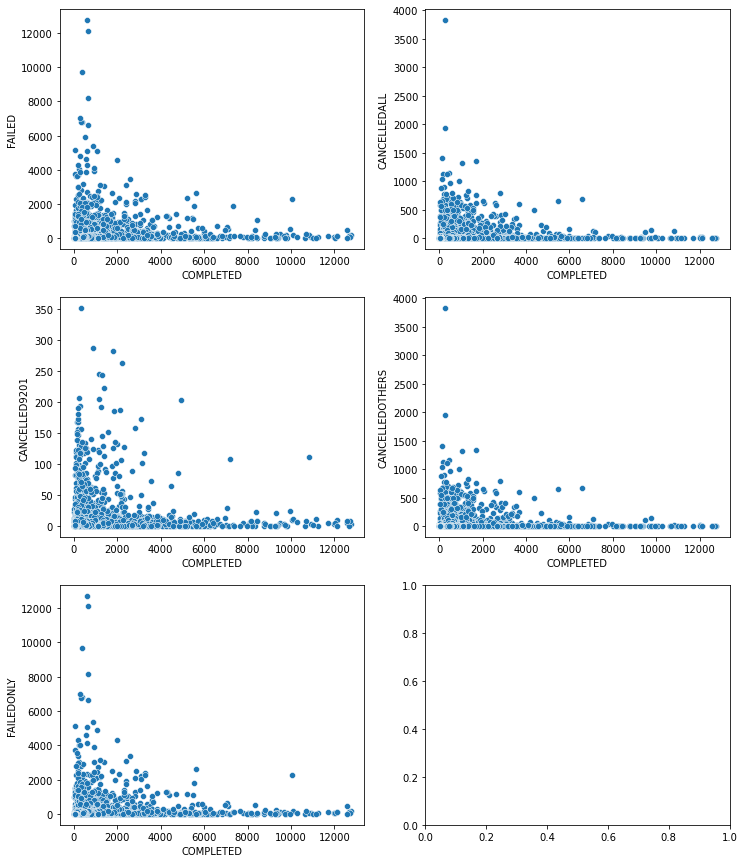

In [20]:
fig, ax = plt.subplots(3, 2, figsize=(12, 15))

sns.scatterplot(jobs_hourly['COMPLETED'], jobs_hourly['FAILED'], ax=ax[0, 0])
sns.scatterplot(jobs_hourly['COMPLETED'], jobs_hourly['CANCELLEDALL'], ax=ax[0, 1])
sns.scatterplot(jobs_hourly['COMPLETED'], jobs_hourly['CANCELLED9201'], ax=ax[1, 0])
sns.scatterplot(jobs_hourly['COMPLETED'], jobs_hourly['CANCELLEDOTHERS'], ax=ax[1, 1])
sns.scatterplot(jobs_hourly['COMPLETED'], jobs_hourly['FAILEDONLY'], ax=ax[2, 0])


<AxesSubplot:xlabel='FAILEDONLY', ylabel='COMPLETED'>

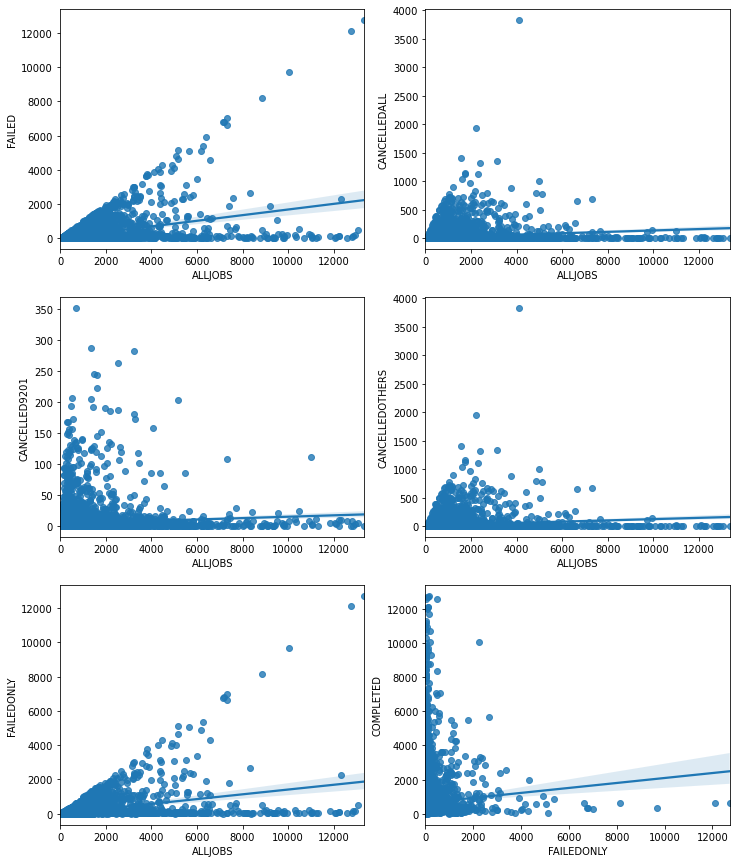

In [21]:
fig, ax = plt.subplots(3, 2, figsize=(12, 15))

sns.regplot(jobs_hourly['ALLJOBS'], jobs_hourly['FAILED'], ax=ax[0, 0])
sns.regplot(jobs_hourly['ALLJOBS'], jobs_hourly['CANCELLEDALL'], ax=ax[0, 1])
sns.regplot(jobs_hourly['ALLJOBS'], jobs_hourly['CANCELLED9201'], ax=ax[1, 0])
sns.regplot(jobs_hourly['ALLJOBS'], jobs_hourly['CANCELLEDOTHERS'], ax=ax[1, 1])
sns.regplot(jobs_hourly['ALLJOBS'], jobs_hourly['FAILEDONLY'], ax=ax[2, 0])
sns.regplot(jobs_hourly['FAILEDONLY'], jobs_hourly['COMPLETED'], ax=ax[2, 1])



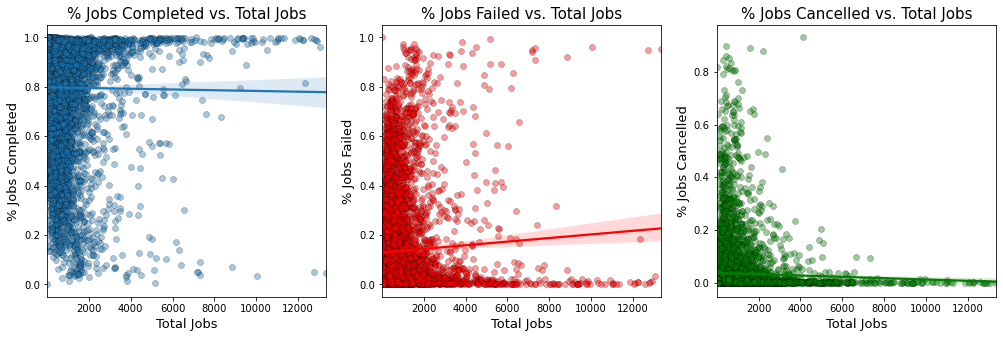

In [22]:
fig, ax = plt.subplots(1, 3, figsize=(17, 5))

edgecolor = 'black'
alpha = 0.4
fontsize = 13

sns.scatterplot(jobs_hourly['ALLJOBS'], jobs_hourly['PERC_COMP'], alpha=alpha, edgecolor=edgecolor, ax=ax[0])
sns.regplot(jobs_hourly['ALLJOBS'], jobs_hourly['PERC_COMP'], scatter=False, ax=ax[0])
ax[0].set_xlabel("Total Jobs", fontsize=fontsize)
ax[0].set_ylabel("% Jobs Completed", fontsize=fontsize)
ax[0].set_title('% Jobs Completed vs. Total Jobs', fontsize=fontsize + 2)

sns.scatterplot(jobs_hourly['ALLJOBS'], jobs_hourly['PERC_FAILED'], alpha=alpha, edgecolor=edgecolor, color='red', ax=ax[1])
sns.regplot(jobs_hourly['ALLJOBS'], jobs_hourly['PERC_FAILED'], scatter=False, color='red', ax=ax[1])
ax[1].set_xlabel("Total Jobs", fontsize=fontsize)
ax[1].set_ylabel("% Jobs Failed", fontsize=fontsize)
ax[1].set_title('% Jobs Failed vs. Total Jobs', fontsize=fontsize + 2)

sns.scatterplot(jobs_hourly['ALLJOBS'], jobs_hourly['PERC_CANCELLED'], alpha=alpha, edgecolor=edgecolor, color='green', ax=ax[2])
sns.regplot(jobs_hourly['ALLJOBS'], jobs_hourly['PERC_CANCELLED'], scatter=False, color='green', ax=ax[2])
ax[2].set_xlabel("Total Jobs", fontsize=fontsize)
ax[2].set_ylabel("% Jobs Cancelled", fontsize=fontsize)
ax[2].set_title('% Jobs Cancelled vs. Total Jobs', fontsize=fontsize + 2)

plt.savefig('../../../../Desktop/job_numb_vs_percentages.png', dpi=150);


<AxesSubplot:xlabel='PERC_COMP', ylabel='FAILEDONLY'>

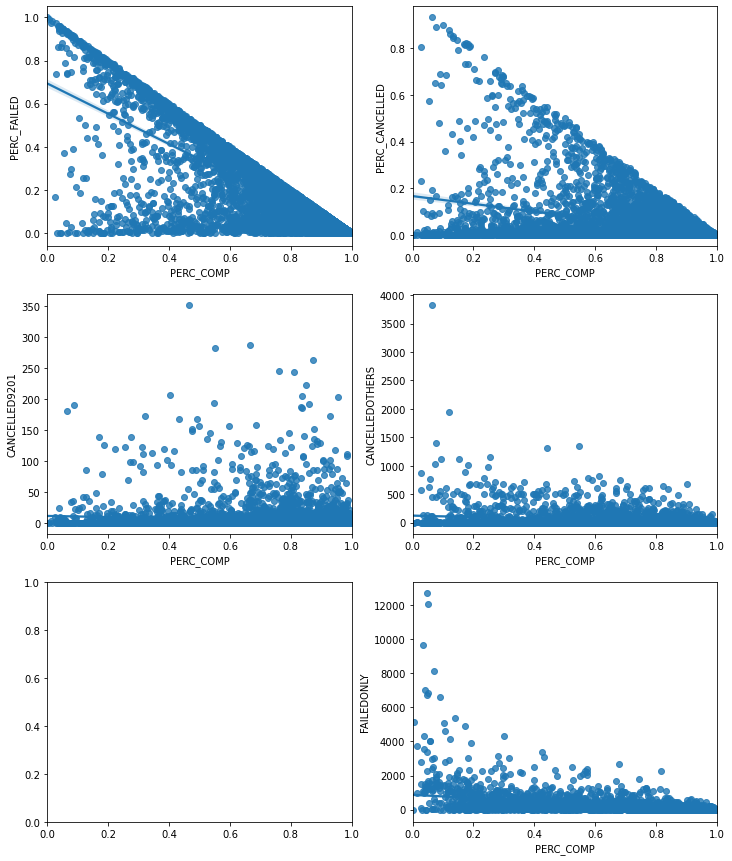

In [23]:
fig, ax = plt.subplots(3, 2, figsize=(12, 15))


sns.regplot(jobs_hourly['PERC_COMP'], jobs_hourly['PERC_FAILED'], ax=ax[0, 0])
sns.regplot(jobs_hourly['PERC_COMP'], jobs_hourly['PERC_CANCELLED'], ax=ax[0, 1])
sns.regplot(jobs_hourly['PERC_COMP'], jobs_hourly['CANCELLED9201'], ax=ax[1, 0])
sns.regplot(jobs_hourly['PERC_COMP'], jobs_hourly['CANCELLEDOTHERS'], ax=ax[1, 1])
#sns.regplot(jobs_hourly['PERC_COMP'], jobs_hourly['PERC_NOTCOMP'], ax=ax[2, 0])
sns.regplot(jobs_hourly['PERC_COMP'], jobs_hourly['FAILEDONLY'], ax=ax[2, 1])


In [63]:
jobs_big_cancelled = jobs_hourly[(jobs_hourly['PERC_CANCELLED'] >= .80) & (jobs_hourly['ALLJOBS'] > 4000)]

In [64]:
jobs_big_cancelled

,END,COMPLETED,FAILED,CANCELLEDALL,CANCELLED9201,CANCELLEDOTHERS,FAILEDONLY,ALLJOBS,PERC_COMP,PERC_NOTCOMP,PERC_CANCELLED,PERC_CANCELLED9201,PERC_CANCELLED_OTHER,PERC_FAILED
8409,2021-09-16 12:00:00,262,3845,3823,0,3823,15,4107,0.063794,0.936206,0.93085,0.0,0.93085,0.003652


In [26]:
jobs_big_complete = jobs_hourly[(jobs_hourly['END'] >= '2020-10-25') & (jobs_hourly['END'] < '2020-10-26')]

In [31]:
jobs_big_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 573 to 596
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   END                   24 non-null     datetime64[ns]
 1   COMPLETED             24 non-null     int64         
 2   FAILED                24 non-null     int64         
 3   CANCELLEDALL          24 non-null     int64         
 4   CANCELLED9201         24 non-null     int64         
 5   CANCELLEDOTHERS       24 non-null     int64         
 6   FAILEDONLY            24 non-null     int64         
 7   ALLJOBS               24 non-null     int64         
 8   PERC_COMP             24 non-null     float64       
 9   PERC_NOTCOMP          24 non-null     float64       
 10  PERC_CANCELLED        24 non-null     float64       
 11  PERC_CANCELLED9201    24 non-null     float64       
 12  PERC_CANCELLED_OTHER  24 non-null     float64       
 13  PERC_FAILED        

In [27]:
jobs_big_complete[['END', 'ALLJOBS', 'PERC_COMP']]

,END,ALLJOBS,PERC_COMP
573,2020-10-25 00:00:00,1516,0.992084
574,2020-10-25 01:00:00,4112,0.996595
575,2020-10-25 02:00:00,4941,0.997571
576,2020-10-25 03:00:00,5864,0.989086
577,2020-10-25 04:00:00,5932,0.997134
578,2020-10-25 05:00:00,6220,0.998875
579,2020-10-25 06:00:00,6242,0.999039
580,2020-10-25 07:00:00,6476,0.998301
581,2020-10-25 08:00:00,6273,0.997609
582,2020-10-25 09:00:00,5077,0.997045


In [95]:
jobs_failed = jobs[(jobs['END'] >= '2020-12-11 08:00:00') & (jobs['END'] <= '2020-12-12')]

In [96]:
jobs_failed[['JOBID_ARRAY', 'ARRAY_NUMB']] = jobs_failed['JOBID'].str.split('_', expand=True)


In [97]:
jobs_failed = jobs_failed[jobs_failed['STATE'] == 'FAILED']

In [98]:
jobs_failed.head()

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,...,REQMEMTOT,REQMEMPERCORE,ROLL1DAY,ROLL1HOUR,ROLL7DAY,ROLL7DAYAVG,ROLL30DAY,ROLL30DAYAVG,JOBID_ARRAY,ARRAY_NUMB
1362493,26361448_13,FAILED,2020-12-11 00:48:42,2020-12-11 08:07:17,81920,2040.65M,0 days 16:00:00,0 days 07:18:35,1,4,...,81920,20480.0,8523.0,516.0,85819.0,12259.857143,500267.0,16675.566667,26361448,13
1362501,26364113_4,FAILED,2020-12-11 08:10:58,2020-12-11 08:11:04,8192,0,0 days 00:50:00,0 days 00:00:06,1,1,...,8192,8192.0,8509.0,338.0,85798.0,12256.857143,500241.0,16674.700000,26364113,4
1362502,26364113_1,FAILED,2020-12-11 08:10:58,2020-12-11 08:11:04,8192,0,0 days 00:50:00,0 days 00:00:06,1,1,...,8192,8192.0,8510.0,339.0,85799.0,12257.000000,500242.0,16674.733333,26364113,1
1362503,26364113_2,FAILED,2020-12-11 08:10:58,2020-12-11 08:11:04,8192,0,0 days 00:50:00,0 days 00:00:06,1,1,...,8192,8192.0,8511.0,340.0,85800.0,12257.142857,500243.0,16674.766667,26364113,2
1362504,26364113_3,FAILED,2020-12-11 08:10:58,2020-12-11 08:11:07,8192,0,0 days 00:50:00,0 days 00:00:09,1,1,...,8192,8192.0,8512.0,338.0,85801.0,12257.285714,500244.0,16674.800000,26364113,3


In [57]:
jobs_failed.value_counts('JOBID_ARRAY')

JOBID_ARRAY
26364140    10255
26369202    10254
26369839     8898
26398299       18
26361448       12
            ...  
26397430        1
26330237        1
26397582        1
26397603        1
26402438        1
Length: 73, dtype: int64

In [65]:
jobs_failed = jobs_failed[(jobs_failed['JOBID_ARRAY'] == '26364140') | (jobs_failed['JOBID_ARRAY'] == '26369202')]
jobs_failed

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,...,REQMEMTOT,REQMEMPERCORE,ROLL1DAY,ROLL1HOUR,ROLL7DAY,ROLL7DAYAVG,ROLL30DAY,ROLL30DAYAVG,JOBID_ARRAY,ARRAY_NUMB
1373219,26369202_214,FAILED,2020-12-11 08:50:04,2020-12-11 08:51:28,8192,0,0 days 00:50:00,0 days 00:01:24,1,1,...,8192,8192.0,19036.0,10751.0,96082.0,13726.000000,510531.0,17017.700000,26369202,214
1373231,26369202_78,FAILED,2020-12-11 08:50:04,2020-12-11 08:51:30,8192,0,0 days 00:50:00,0 days 00:01:26,1,1,...,8192,8192.0,19047.0,10763.0,96094.0,13727.714286,510543.0,17018.100000,26369202,78
1373234,26369202_124,FAILED,2020-12-11 08:50:04,2020-12-11 08:51:31,8192,0,0 days 00:50:00,0 days 00:01:27,1,1,...,8192,8192.0,19050.0,10766.0,96097.0,13728.142857,510546.0,17018.200000,26369202,124
1373235,26369202_4,FAILED,2020-12-11 08:50:04,2020-12-11 08:51:31,8192,0,0 days 00:50:00,0 days 00:01:27,1,1,...,8192,8192.0,19051.0,10767.0,96098.0,13728.285714,510547.0,17018.233333,26369202,4
1373237,26369202_182,FAILED,2020-12-11 08:50:04,2020-12-11 08:51:31,8192,0,0 days 00:50:00,0 days 00:01:27,1,1,...,8192,8192.0,19053.0,10769.0,96100.0,13728.571429,510549.0,17018.300000,26369202,182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384153,26369202_10227,FAILED,2020-12-11 09:37:44,2020-12-11 09:39:45,8192,0,0 days 00:50:00,0 days 00:02:01,1,1,...,8192,8192.0,29766.0,14240.0,106776.0,15253.714286,520694.0,17356.466667,26369202,10227
1384148,26369202_10186,FAILED,2020-12-11 09:37:44,2020-12-11 09:39:45,8192,0,0 days 00:50:00,0 days 00:02:01,1,1,...,8192,8192.0,29761.0,14235.0,106771.0,15253.000000,520689.0,17356.300000,26369202,10186
1384226,26369202_10238,FAILED,2020-12-11 09:37:44,2020-12-11 09:39:48,8192,0,0 days 00:50:00,0 days 00:02:04,1,1,...,8192,8192.0,29839.0,14294.0,106849.0,15264.142857,520759.0,17358.633333,26369202,10238
1384213,26369202_10212,FAILED,2020-12-11 09:37:44,2020-12-11 09:39:48,8192,0,0 days 00:50:00,0 days 00:02:04,1,1,...,8192,8192.0,29826.0,14281.0,106836.0,15262.285714,520746.0,17358.200000,26369202,10212


In [81]:
jobs_cancelled = jobs[(jobs['END'] >= '2021-09-16 11:00:00') & (jobs['END'] <= '2021-09-16 13:30:00')]
jobs_cancelled.head()

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,REQMEMTOT,REQMEMPERCORE,ROLL1DAY,ROLL1HOUR,ROLL7DAY,ROLL7DAYAVG,ROLL30DAY,ROLL30DAYAVG
7087018,32446985_14,TIMEOUT,2021-09-16 01:00:17,2021-09-16 11:00:35,4096,449.40M,0 days 10:00:00,0 days 10:00:18,1,1,production,0:15,4096,4096.0,62920.0,1458.0,341956.0,48850.857143,1138653.0,37955.100000
7087019,32558599,COMPLETED,2021-09-16 10:59:17,2021-09-16 11:01:00,2000,0.09M,2 days 00:00:00,0 days 00:01:43,1,1,sam,0:0,2000,2000.0,62918.0,1459.0,341953.0,48850.428571,1138653.0,37955.100000
7087020,32558604,COMPLETED,2021-09-16 11:03:18,2021-09-16 11:05:59,4096,848.18M,0 days 12:00:00,0 days 00:02:41,1,1,production,0:0,4096,4096.0,62899.0,1456.0,341923.0,48846.142857,1138523.0,37950.766667
7087022,32446985_16,TIMEOUT,2021-09-16 01:07:17,2021-09-16 11:07:36,4096,447.34M,0 days 10:00:00,0 days 10:00:19,1,1,production,0:15,4096,4096.0,62898.0,1456.0,341919.0,48845.571429,1138411.0,37947.033333
7087021,32446985_15,TIMEOUT,2021-09-16 01:07:17,2021-09-16 11:07:36,4096,446.89M,0 days 10:00:00,0 days 10:00:19,1,1,production,0:15,4096,4096.0,62897.0,1455.0,341918.0,48845.428571,1138410.0,37947.000000


In [90]:
jobs_cancelled[['CANCELLED', 'by', 'USER']] = jobs_cancelled['STATE'].str.split(expand=True)
jobs_cancelled['STATE'].unique()

array(['CANCELLED by 491383', 'CANCELLED by 752904',
       'CANCELLED by 546080', 'CANCELLED by 776170',
       'CANCELLED by 168618'], dtype=object)

In [91]:
jobs_cancelled = jobs_cancelled[jobs_cancelled['STATE'].str.contains('CANCELLED')]
jobs_cancelled.value_counts('USER')

USER
491383    3865
776170       2
168618       1
546080       1
752904       1
dtype: int64

In [92]:
jobs_cancelled = jobs_cancelled[jobs_cancelled['USER'] == '491383']
jobs_cancelled

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,...,ROLL1HOUR,ROLL7DAY,ROLL7DAYAVG,ROLL30DAY,ROLL30DAYAVG,JOBID_ARRAY,ARRAY_NUMB,CANCELLED,by,USER
7087091,32447014_41,CANCELLED by 491383,2021-09-16 11:41:18,2021-09-16 11:48:02,4096,436.04M,0 days 10:00:00,0 days 00:06:44,1,1,...,95.0,341247.0,48749.571429,1136593.0,37886.433333,32447014,41,CANCELLED,by,491383
7087092,32447014_33,CANCELLED by 491383,2021-09-16 11:16:18,2021-09-16 11:48:02,4096,443.91M,0 days 10:00:00,0 days 00:31:44,1,1,...,96.0,341248.0,48749.714286,1136594.0,37886.466667,32447014,33,CANCELLED,by,491383
7087093,32447014_25,CANCELLED by 491383,2021-09-16 10:50:18,2021-09-16 11:48:02,4096,444.07M,0 days 10:00:00,0 days 00:57:44,1,1,...,97.0,341249.0,48749.857143,1136595.0,37886.500000,32447014,25,CANCELLED,by,491383
7087090,32447014_35,CANCELLED by 491383,2021-09-16 11:20:18,2021-09-16 11:48:02,4096,445.57M,0 days 10:00:00,0 days 00:27:44,1,1,...,94.0,341246.0,48749.428571,1136592.0,37886.400000,32447014,35,CANCELLED,by,491383
7087094,32447014_23,CANCELLED by 491383,2021-09-16 10:45:18,2021-09-16 11:48:02,4096,444.48M,0 days 10:00:00,0 days 01:02:44,1,1,...,98.0,341250.0,48750.000000,1136596.0,37886.533333,32447014,23,CANCELLED,by,491383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7091140,32560174_5,CANCELLED by 491383,2021-09-16 12:08:18,2021-09-16 12:45:01,4096,453.42M,0 days 10:00:00,0 days 00:36:43,1,1,...,4074.0,344506.0,49215.142857,1139242.0,37974.733333,32560174,5,CANCELLED,by,491383
7091139,32560174_4,CANCELLED by 491383,2021-09-16 12:08:18,2021-09-16 12:45:01,4096,453.58M,0 days 10:00:00,0 days 00:36:43,1,1,...,4073.0,344505.0,49215.000000,1139241.0,37974.700000,32560174,4,CANCELLED,by,491383
7091138,32560174_3,CANCELLED by 491383,2021-09-16 12:08:18,2021-09-16 12:45:01,4096,453.28M,0 days 10:00:00,0 days 00:36:43,1,1,...,4072.0,344504.0,49214.857143,1139240.0,37974.666667,32560174,3,CANCELLED,by,491383
7091137,32560174_2,CANCELLED by 491383,2021-09-16 12:08:18,2021-09-16 12:45:01,4096,453.39M,0 days 10:00:00,0 days 00:36:43,1,1,...,4071.0,344503.0,49214.714286,1139239.0,37974.633333,32560174,2,CANCELLED,by,491383
